In [1]:
import sys
sys.path.append("..")
import multi_axis as ma
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
from skimage.data import binary_blobs


Bad key "text.kerning_factor" on line 4 in
C:\Users\Sauron\anaconda3\envs\grl31-1\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def plot_topfrontside(P,noise=False,title=True):
    font = {'family':'sans-serif','sans-serif':'Arial',
            'size'   : 13}
    matplotlib.rc('font', **font)
    
    p1 =np.mean(P,axis=2)
    p2=np.mean(np.transpose(P,(2,1,0)),axis=2)[::-1]
    p3 = np.flipud(np.mean(P,axis=1).T)
    
    if noise == True:
        p1 = ma.noisy(p1,noise_typ='poisson',val_pois=100)
        p2 = ma.noisy(p2,noise_typ='poisson',val_pois=100)
        p3 = ma.noisy(p3,noise_typ='poisson',val_pois=100)

    f,axs = plt.subplots(ncols=3)
    axs[0].imshow(p1,cmap='Greys_r')
    axs[0].axis('off')
    if title==True:
        axs[0].set_title('Top')

    axs[1].imshow(p2,cmap='Greys_r')
    axs[1].axis('off')
    if title==True:
        axs[1].set_title('Front')

    axs[2].imshow(p3,cmap='Greys_r')
    axs[2].axis('off')
    if title==True:
        axs[2].set_title('Side')
    
# def generate_angles(mode='x',n_tilt = 40, alpha=70,beta=40,gamma=180,dist_n2=None,tilt2='gamma'):
#     """ Return a list of [ax,ay,az] lists, each corresponding to axial
#     rotations applied to [0,0,1] to get a new projection direction.
    
#     Modes = x, y, dual, quad, sync, dist, rand
    
#     Specify the +- tilt range of alpha/beta/gamma
    
#     Say total number of tilts n_tilt
    
#     For dist, each alpha has 'dist_n2' 'tilt2' projections
    
#     Specify if the 2nd tilt axis is beta or gamma """
    
#     angles = []
#     ax,ay,az = 0,0,0
    
#     oddeven = int(n_tilt%2)
    
#     if dist_n2 == None:
#         dist_n2=int(n_tilt**.4)
    
#     # x series
#     if mode=='x':
#         for ax in np.linspace(-alpha,alpha,n_tilt):
#             angles.append([ax,ay,az])
            
#     if mode=='dual':
#         for ax in np.linspace(-alpha,alpha,int(n_tilt/2)):
#             angles.append([ax,ay,az])
            
#         ax,ay,az = 0,0,0
#         if tilt2 == 'gamma':

#             az = 90
#             for ax in np.linspace(-alpha,alpha,int(n_tilt/2)):
#                 angles.append([ax,ay,az])
    
#     if mode=='quad':
#         for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
#             angles.append([ax,ay,az])
#         az = 90
#         for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
#             angles.append([ax,ay,az])
#         az = 45
#         for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
#             angles.append([ax,ay,az])
#         az = -45
#         for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
#                 angles.append([ax,ay,az])           

#     # random series # g or b
#     if mode=='rand':
#         for i in range(n_tilt):
#             ax_rand = np.random.rand()*alpha*2 - alpha
#             az_rand = np.random.rand()*gamma*2 - gamma
#             angles.append([ax_rand,0,az_rand])
            
#     # alpha propto beta series # g or b
#     if mode=='sync-b':

#         ax = np.linspace(-alpha,alpha,int(n_tilt/2))
#         ay = np.linspace(-beta,beta,int(n_tilt/2))

#         for i,a in enumerate(ax):
#             angles.append([a,ay[i],0])

#         for i,a in enumerate(ax):
#             angles.append([a,-ay[i],0])
                
#     if mode=='sync-g':

#         ax = np.linspace(-alpha,alpha,int(n_tilt/2))
#         az = np.linspace(-gamma,gamma,int(n_tilt/2))

#         for i,a in enumerate(ax):
#             angles.append([a,0,az[i]])

#         for i,a in enumerate(ax):
#             angles.append([a,0,-az[i]])
            
#     if mode=='sync-g2':

#         ax = np.linspace(-alpha,alpha,int(n_tilt/2))
#         az = np.linspace(-gamma,0,int(n_tilt/4))
            
#         if oddeven == 1:
#             az = np.concatenate((az,[0],az[::-1]))
#         else:
#             az = np.concatenate((az,az[::-1]))

#         for i,a in enumerate(ax):
#             angles.append([a,0,az[i]])

#         for i,a in enumerate(ax):
#             angles.append([a,0,-az[i]])
                
#         # alpha propto beta series # g or b
#     if mode=='sx-b':

#             ax = np.linspace(-alpha,alpha,int(n_tilt))
#             ay = np.linspace(-beta,beta,int(n_tilt))

#             for i,a in enumerate(ax):
#                 angles.append([a,ay[i],0])
                
#     if mode=='sx-g':

#             ax = np.linspace(-alpha,alpha,int(n_tilt))
#             az = np.linspace(-gamma,gamma,int(n_tilt))

#             for i,a in enumerate(ax):
#                 angles.append([a,0,az[i]])
        
#     if mode=='sx-g2':

#             ax = np.linspace(-alpha,alpha,int(n_tilt))
#             az = np.linspace(-gamma,0,int(n_tilt/2))
            
#             if oddeven == 1:
#                 az = np.concatenate((az,[0],az[::-1]))
#             else:
#                 az = np.concatenate((az,az[::-1]))
            

#             for i,a in enumerate(ax):
#                 angles.append([a,0,az[i]])

#             # for i,a in enumerate(ax):
#             #     angles.append([a,0,-az[i]])
            
#     # even spacing # g or b
#     if mode=='conical-b':
#         ax = np.linspace(-alpha,alpha,int(n_tilt/dist_n2))


#         ay = np.linspace(-beta,beta,dist_n2)
#         for x in ax:
#             for y in ay:
#                 angles.append([x,y,0])
                    
#     if mode=='conical-g':
#         ax = np.linspace(-alpha,alpha,int(n_tilt/dist_n2))


#         az = np.linspace(-90,90,dist_n2+1)
#         for x in ax:
#             for z in az[:-1]:
#                 angles.append([x,0,z])
    
#     return angles


def create_nanoring(n=100, r1=30, r2=10, e=1):
    """ 
    Creates 3D scalar ring phantom.
    n is pixel space size
    r1 is centre to mid-tube
    r2 is mid-tube to outer-tube
    e is not quite eccentricity: 1 = normal, <1 = thick
    """
    
    xs = np.linspace(-n/2,n/2,int(n))
    ys = np.linspace(-n/2,n/2,int(n))
    zs = np.linspace(-n/2,n/2,int(n))
    
    data = []
    for x in xs:
        for y in ys:
            for z in zs:
                if ((x**2+y**2)**0.5 - r1)**2 + e*z**2 < r2**2:
                    data.append(1)
                else:
                    data.append(0)
                    
    P = np.array(data)              
    P = P.reshape(len(xs),len(ys),len(zs))
    
    return P

def create_overgrowth(n=100, l=50,f=0.3):
    """ 
    Creates 3D scalar ring phantom.
    n is pixel space size
    r1 is centre to mid-tube
    r2 is mid-tube to outer-tube
    e is not quite eccentricity: 1 = normal, <1 = thick
    """
    
    xs = np.linspace(-n/2,n/2,int(n))
    ys = np.linspace(-n/2,n/2,int(n))
    zs = np.linspace(-n/2,n/2,int(n))
    
    data = []
    for x in xs:
        for y in ys:
            for z in zs:
                # cube
                if abs(x)<l/2 and abs(y)<l/2 and abs(z)<l/2:
                    #top wedge
                    if z>=0:
                        if y < x + f*l and y > x - f*l:
                            data.append(1)
                        else:
                            data.append(0)
                    else:
                        if y < -x + f*l and y > -x - f*l:
                            data.append(1)
                        else:
                            data.append(0)
                else:
                    data.append(0)
                    
    P = np.array(data)              
    P = P.reshape(len(xs),len(ys),len(zs))
    
    return P

def generate_angles(mode='x',n_tilt = 40, alpha=70,beta=40,gamma=180,dist_n2=None,tilt2='gamma'):
    """ Return a list of [ax,ay,az] lists, each corresponding to axial
    rotations applied to [0,0,1] to get a new projection direction.
    
    Modes = x, y, dual, quad, sync, dist, rand
    
    Specify the +- tilt range of alpha/beta/gamma
    
    Say total number of tilts n_tilt
    
    For dist, each alpha has 'dist_n2' 'tilt2' projections
    
    Specify if the 2nd tilt axis is beta or gamma """
    
    angles = []
    ax,ay,az = 0,0,0
    
    oddeven = int(n_tilt%2)
    
    if dist_n2 == None:
        dist_n2=int(n_tilt**.4)
    
    # x series
    if mode=='x':
        for ax in np.linspace(-alpha,alpha,n_tilt):
            angles.append([ax,ay,az])
            
    if mode=='dual':
        for ax in np.linspace(-alpha,alpha,int(n_tilt/2)):
            angles.append([ax,ay,az])
            
        ax,ay,az = 0,0,0
        if tilt2 == 'gamma':

            az = 90
            for ax in np.linspace(-alpha,alpha,int(n_tilt/2)):
                angles.append([ax,ay,az])
    
    if mode=='quad':
        for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
            angles.append([ax,ay,az])
        az = 90
        for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
            angles.append([ax,ay,az])
        az = 45
        for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
            angles.append([ax,ay,az])
        az = -45
        for ax in np.linspace(-alpha,alpha,int(n_tilt/4)):
                angles.append([ax,ay,az])           

    # random series # g or b
    if mode=='rand':
        for i in range(n_tilt):
            ax_rand = np.random.rand()*alpha*2 - alpha
            az_rand = np.random.rand()*gamma*2 - gamma
            angles.append([ax_rand,0,az_rand])
            
    if mode=='uniform-rand':
        for i in range(n_tilt):
            CS = np.cos((alpha)*np.pi/180)
            neg = np.random.randint(0,2) # to make half of them negative
            if neg == 0:
                neg = -1
                
            # theta value should be uniform in its arccos to sample sphere evenly
            ax_rand = np.arccos(1-np.random.rand()*(1-CS))*180/np.pi*neg
            az_rand = np.random.rand()*gamma*2 - gamma
            angles.append([ax_rand,0,az_rand])
            
    # alpha propto beta series # g or b
    if mode=='sync-b':

        ax = np.linspace(-alpha,alpha,int(n_tilt/2))
        ay = np.linspace(-beta,beta,int(n_tilt/2))

        for i,a in enumerate(ax):
            angles.append([a,ay[i],0])

        for i,a in enumerate(ax):
            angles.append([a,-ay[i],0])
                
    if mode=='sync-g':

        ax = np.linspace(-alpha,alpha,int(n_tilt/2))
        az = np.linspace(-gamma,gamma,int(n_tilt/2))

        for i,a in enumerate(ax):
            angles.append([a,0,az[i]])

        for i,a in enumerate(ax):
            angles.append([a,0,-az[i]])
            
    if mode=='sync-g2':

        ax = np.linspace(-alpha,alpha,int(n_tilt/2))
        az = np.linspace(-gamma,0,int(n_tilt/4))
            
        if oddeven == 1:
            az = np.concatenate((az,[0],az[::-1]))
        else:
            az = np.concatenate((az,az[::-1]))

        for i,a in enumerate(ax):
            angles.append([a,0,az[i]])

        for i,a in enumerate(ax):
            angles.append([a,0,-az[i]])
                
        # alpha propto beta series # g or b
    if mode=='sx-b':

            ax = np.linspace(-alpha,alpha,int(n_tilt))
            ay = np.linspace(-beta,beta,int(n_tilt))

            for i,a in enumerate(ax):
                angles.append([a,ay[i],0])
                
    if mode=='sxb-dual':

            ax = np.linspace(-alpha,alpha,int(n_tilt/2))
            ay = np.linspace(-beta,beta,int(n_tilt/2))

            for i,a in enumerate(ax):
                angles.append([a,ay[i],0])
            for i,a in enumerate(ax):
                angles.append([a,ay[i],90])
                
            
    # even spacing # g or b
    if mode=='conical-b':
        ax = np.linspace(-alpha,alpha,int(n_tilt/dist_n2))


        ay = np.linspace(-beta,beta,dist_n2)
        for x in ax:
            for y in ay:
                angles.append([x,y,0])
                    
    if mode=='conical-g':
        ax = np.linspace(-alpha,alpha,int(n_tilt/dist_n2))


        az = np.linspace(-90,90,dist_n2+1)
        for x in ax:
            for z in az[:-1]:
                angles.append([x,0,z])
                
    if mode=='sx-g':

        ax = np.linspace(-alpha,alpha,int(n_tilt))
        az = np.linspace(-gamma,gamma,int(n_tilt))

        for i,a in enumerate(ax):
            angles.append([a,0,az[i]])
        
    if mode=='sx-g2':

            ax = np.linspace(-alpha,alpha,int(n_tilt))
            az = np.linspace(-gamma/2,gamma/2,int(n_tilt/2))

            if oddeven == 1:
                az = np.concatenate((az,[0],az[::-1]))
            else:
                az = np.concatenate((az,az[::-1]))
            

            for i,a in enumerate(ax):
                angles.append([a,0,az[i]])
                
    if mode=='sx-g3':

            ax = np.linspace(-alpha,alpha,int(n_tilt))
            ay = np.linspace(-beta,beta,int(n_tilt))
            az = 90-np.arctan2(np.cos(ax*np.pi/180),np.cos(ay*np.pi/180))*180/np.pi

            for i,a in enumerate(ax):
                angles.append([a,0,az[i]])
            
    if mode=='sx-g4':

            ax = np.linspace(-alpha,alpha,int(n_tilt))
            ay = np.linspace(-beta,beta,int(n_tilt))
            az = 1/0.0053468*np.log(np.cos(ax*np.pi/180))

            for i,a in enumerate(ax):
                angles.append([a,0,az[i]])
                
    if mode=='sx-g5':

            ax = np.linspace(-alpha,alpha,int(n_tilt))
            ay = np.linspace(-beta,beta,int(n_tilt))
            az = 1/(np.cos(ax*np.pi/180))**2

            for i,a in enumerate(ax):
                angles.append([a,0,az[i]])
                
    if mode=='sx-g6':
                
    # Mode 6 - (Fermat spiral)
            ax = np.linspace(-alpha,alpha,int(n_tilt))
            ay = np.linspace(-beta,beta,int(n_tilt))
            a=.085
            az = (np.cos(ax*np.pi/180))**2 / a**2
            
            for i,a in enumerate(ax):
                angles.append([a,0,az[i]])
    
    if mode == 'sx-g7':

        # Mode 7 - (Archimediean spiral)
        ax = np.linspace(-alpha,alpha,int(n_tilt))
        ay = np.linspace(-beta,beta,int(n_tilt))
        a=0 # centre position
        b=0.008 # loop tightness
        az = (np.cos(ax*np.pi/180)-a) / b
        
        for i,a in enumerate(ax):
            angles.append([a,0,az[i]])
            
    if mode == 'sx2-dual':

        ax = np.linspace(-alpha,alpha,int(n_tilt/2))
        az = np.linspace(-gamma/2,gamma/2,int(n_tilt/4))

        if oddeven == 1:
            az = np.concatenate((az,[0],az[::-1]))
        else:
            az = np.concatenate((az,az[::-1]))


        for i,a in enumerate(ax):
            angles.append([a,0,az[i]])
            
        for i,a in enumerate(ax):
            angles.append([a,0,az[i]+90])

    return angles

from scipy import ndimage

def generate_proj_data_2(P,angles,normalise=True):
    """ Returns projection dataset given phantom P
    and 3D projection angles list.
    
    Output is normalised and reshaped such that the
    projection slice dimension is in the middle, so as
    to be compatible with astra."""
    P_projs = []
    
    for i in range(len(angles)):
        ax,ay,az = angles[i]
        P_rot = rotate_bulk_2(P,ax,ay,az) 
        P_rot_proj =np.flipud(np.sum(P_rot,axis=2).T) #flip/T match data shape to expectations
        P_projs.append(P_rot_proj) 
        
    # Prepare projections for reconstruction
    raw_data = np.array(P_projs)
    if normalise == True:
        raw_data = raw_data -  raw_data.min()
        raw_data = raw_data/raw_data.max()
    raw_data = np.transpose(raw_data,axes=[1,0,2]) # reshape so proj is middle column
        
    return raw_data

def rotate_bulk_2(P,ax,ay,az,mode='ndimage'):
    """ 
    Rotate magnetisation locations from rotation angles ax,ay,az 
    about the x,y,z axes (given in degrees) 
    
    Can use PIL or ndimage. ndimage def works but PIL faster (should work! currently doesn't handle -ve)
    
    NOTE: This implementation of scipy rotations is EXTRINSIC
    Therefore, to make it compatible with our intrinsic vector
    rotation, we swap the order of rotations (i.e. x then y then z)
    """
    # Due to indexing, ay needs reversing for desired behaviour
    if mode == 'PIL':
        nx,ny,nz = np.shape(P)
        Prot = np.zeros_like(P)
        ax,ay,az=ax,-ay,az
        scale = 256/np.max(P)
        for i in range(nx):
            im = Image.fromarray(P[i,:,:]*scale).convert('L')
            im = im.rotate(ax,resample = Image.BILINEAR)
            Prot[i,:,:] = np.array(im)/scale
        for j in range(ny):
            im = Image.fromarray(Prot[:,j,:]*scale).convert('L')
            im = im.rotate(ay,resample = Image.BILINEAR)
            Prot[:,j,:] = np.array(im)/scale
        for k in range(nz):
            im = Image.fromarray(Prot[:,:,k]*scale).convert('L')
            im = im.rotate(az,resample = Image.BILINEAR)
            Prot[:,:,k] = np.array(im)/scale
            
        return Prot
    
    else:
        ay = -ay
        
        P = ndimage.rotate(P,az,reshape=False,axes=(0,1),order=1)
        
        P = ndimage.rotate(P,ay,reshape=False,axes=(2,0),order=1)
        
        P = ndimage.rotate(P,ax,reshape=False,axes=(1,2),order=1)
        

        return P
    
def generate_vectors_2(angles):
    """ Converts list of 3D projection angles into
    list of astra-compatible projection vectors,
    with [r,d,u,v] vectors on each row. """
    vectors = []
    for [ax,ay,az] in angles:
        vector = get_astravec_2(ax,ay,az)
        vectors.append(vector)
    
    return vectors

def get_astravec_2(ax,ay,az):
    """ Given angles in degrees, return r,d,u,v as a concatenation
    of four 3-component vectors"""
    # Since we us flipud on y axis, ay needs reversing for desired behaviour
    ay = -ay 
    
    # centre of detector
    d = [0,0,0]
    
    # 3D rotation matrix - EXTRINSIC!
    mrot = np.array(ma.rotation_matrix(ax,ay,az,intrinsic=True))
    
    # ray direction r
    r = mrot.dot([0,0,1])*-1 # -1 to match astra definitions
    # u (det +x)
    u = mrot.dot([1,0,0])
    # v (det +y)
    v = mrot.dot([0,1,0])

    return np.concatenate((r,d,u,v))

In [1705]:
np.cos((70)*np.pi/180)

0.3420201433256688

## Scalar Phantoms

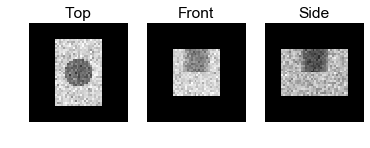

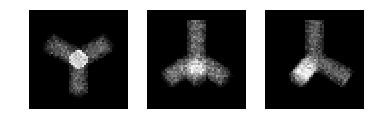

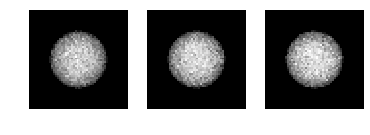

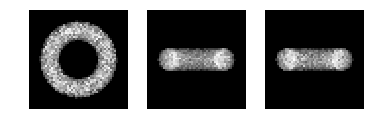

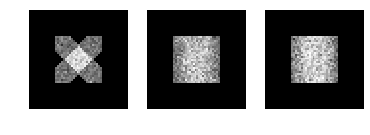

In [3]:
Ps = []
f=.5
X,Y,Z,P = ma.generate_pillar_cavities(n=100*f,x_len=70*f,y_len=50*f,z_len=50*f,r_cyl=15*f,depth=25*f)
plot_topfrontside(P,noise=True)
Ps.append(P)

plt.show()

X,Y,Z,P = ma.generate_tetrapod(n=100*f,r_tet=40*f,r_cyl=10*f)
plot_topfrontside(P,noise=True,title=False)
Ps.append(P)

plt.show
X,Y,Z,P = ma.generate_sphere(n=100*f,r=30*f)
plot_topfrontside(P,noise=True,title=False)
Ps.append(P)

plt.show()
P = create_nanoring(n=100*f,r1=30*f,r2=10*f,e=.7)
plot_topfrontside(P,noise=True,title=False)
Ps.append(P)

plt.show()
P = create_overgrowth(n=100*f,l=50*f)
plot_topfrontside(P,noise=True,title=False)
Ps.append(P)

In [7]:
snrs = []
for P in Ps:
    p1 =np.mean(P,axis=2)
    p1n = ma.noisy(p1,noise_typ='poisson',val_pois=100)
    noise = p1n-p1
    SNR = np.var(p1)/np.var(noise)
    #print('SNR: ',SNR)
    snrs.append(SNR)
    
np.mean(snrs),np.std(snrs)

(25.9212906254249, 6.94095529163961)

In [17]:
angles

[]

In [23]:
angles = generate_angles(mode='sx-g2',alpha=70,n_tilt=20,beta=0,dist_n2=1,gamma=180)
#angles = generate_angles(mode='x',alpha=70,n_tilt=20,beta=0,dist_n2=1,gamma=180)
            

vectors = generate_vectors_2(angles)
raw_data = generate_proj_data_2(Ps[0],angles,normalise=False)
#raw_data = ma.generate_proj_data(Ps[0],angles,normalise=False)

ma.plot_phases_interactive(raw_data)

interactive(children=(IntSlider(value=9, description='i', max=19), Output()), _dom_classes=('widget-interact',…

## Main acquisition schemes

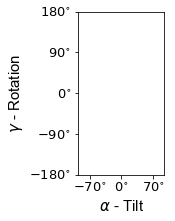

x 64


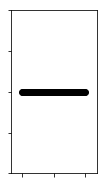

dual 64


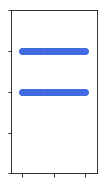

quad 64


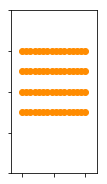

conical-g 63


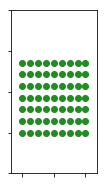

sx-g2 64


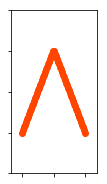

sx2-dual 64


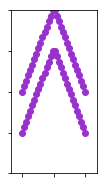

uniform-rand 64


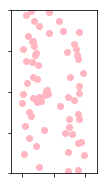

In [360]:
font = {'family':'sans-serif','sans-serif':'Arial',
            'size'   : 13}
matplotlib.rc('font', **font)

modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','uniform-rand']
colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']

n_tilt,dist = 64,7

plt.figure(figsize=(3,3))
plt.xlim([-95,95])
plt.ylim([-180,180])

plt.xticks([-70,0,70],['$-70^{\circ}$','$0^{\circ}$','$70^{\circ}$'])
plt.yticks([-180,-90,0,90,180],['$-180^{\circ}$','$-90^{\circ}$','$0^{\circ}$','$90^{\circ}$','$180^{\circ}$'])
ax=plt.gca()
ax.set_aspect('equal')


plt.xlabel(r'$\alpha$ - Tilt',fontsize=15)
plt.ylabel(r'$\gamma$ - Rotation',fontsize=15)
plt.show()

for i,m in enumerate(modes):
    
    c=colors[i]
    ang = np.array(generate_angles(m,n_tilt=n_tilt,dist_n2=dist))
    print(m,len(ang))
    axs = ang[:,0]
    azs = ang[:,2]
    
    plt.figure(figsize=(3,3))
    
    for a in ang:
        mrot = ma.rotation_matrix(a[0],a[1],a[2],intrinsic=True)
        b = np.dot(mrot,[0,0,1])
        plt.scatter(a[0],a[2],color=c)
    
    plt.xlim([-95,95])
    plt.ylim([-180,180])
    
    plt.xticks([-70,0,70],[])
    plt.yticks([-180,-90,0,90,180],[])
    
    ax=plt.gca()
    ax.set_aspect('equal')
    plt.show()
    

x 64


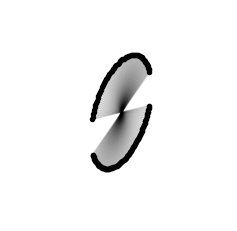

dual 64


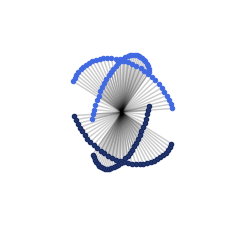

quad 64


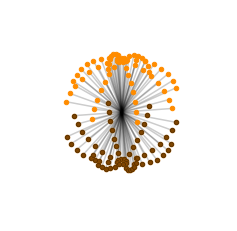

conical-g 63


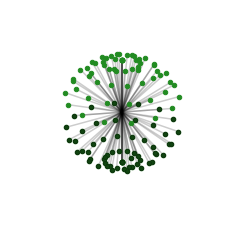

sx-g2 64


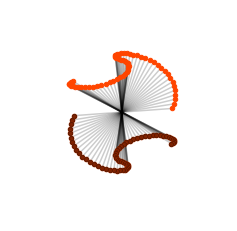

sx2-dual 64


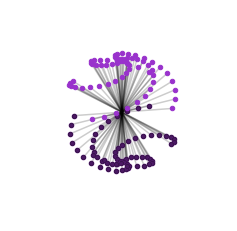

uniform-rand 64


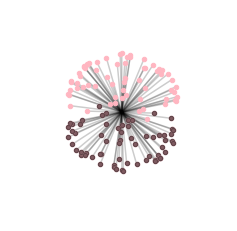

In [361]:
modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','uniform-rand']
#n_tilt, dist_n2 = 20, 5
n_tilt, dist_n2 = 64, 7

#set distn2=7 for n=64, for high
# set distn2=5, n = 20 for low

for j,val in enumerate(modes):
    c = colors[j]

    angles = generate_angles(mode=val,n_tilt=n_tilt,alpha=70,beta=90,gamma=180,dist_n2=dist_n2)

    # plot a collection scheme
    %matplotlib inline
    fig = plt.figure(figsize=(4,4))
    ax1 = fig.gca(projection='3d')

    bs = []
    for i,a in enumerate(angles):
        mrot = ma.rotation_matrix(a[0],a[1],a[2],intrinsic=True)
        b = np.dot(mrot,[0,0,1])
        bs.append(b)
        plt.plot([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],'-',color='k',alpha=.2)
        #ax1.scatter([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],c=[-b[2],b[2]],s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([b[0]],[b[1]],[b[2]],c=c,s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([-b[0]],[-b[1]],[-b[2]],c=c,s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([-b[0]],[-b[1]],[-b[2]],c='k',s=20,cmap='coolwarm',alpha=.5)

    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.set_zticklabels([])
    plt.xlabel('x',fontsize='20')
    plt.ylabel('y',fontsize='20')
    ax1.set_zlabel('z',fontsize='20')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    ax1.set_zlim([-1,1])
    plt.axis('off')

    f = plt.gcf()
    f.patch.set_facecolor('white')
    print(val, len(angles))
    plt.show()

## Main simulated scalar results

In [1895]:
Ps = []
pnames=['pil','tet','sph','ring','over']

f=.5
X,Y,Z,P = ma.generate_pillar_cavities(n=100*f,x_len=70*f,y_len=50*f,z_len=50*f,r_cyl=15*f,depth=25*f)
Ps.append(P)

X,Y,Z,P = ma.generate_tetrapod(n=100*f,r_tet=40*f,r_cyl=10*f)
Ps.append(P)

X,Y,Z,P = ma.generate_sphere(n=100*f,r=30*f)
Ps.append(P)

P = create_nanoring(n=100*f,r1=30*f,r2=10*f,e=.7)
Ps.append(P)

P = create_overgrowth(n=100*f,l=50*f)
Ps.append(P)

In [1896]:
def test_series(P,fname='test',ntest=30,alg='TV1',niter=20,weight=0.1,alpha = 45,n_tilt=30,beta=30,gamma=180,dist_n2=7):
    modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','uniform-rand']

    all_res = []
    for i in range(ntest):
        ax,ay,az=np.random.rand(3)*360
        Pr = ma.rotate_bulk(P,ax,ay,az)
        res = []
        for val in modes:
            angles = generate_angles(mode=val,alpha=alpha,n_tilt=n_tilt,beta=beta,dist_n2=dist_n2,gamma=gamma)
            
            if val in ['sx-g2','sx2-dual','uniform-rand'] :
                vectors = generate_vectors_2(angles)
                raw_data = generate_proj_data_2(Pr,angles,normalise=False)
            else:
                vectors = ma.generate_vectors(angles)
                raw_data = ma.generate_proj_data(Pr,angles)
                
            raw_data = ma.noisy(raw_data,noise_typ='poisson',val_pois=100)
            r = ma.generate_reconstruction(raw_data,vectors,algorithm=alg,niter=niter,weight=weight)
            r = ma.reorient_reconstruction(r)
            cod = ma.COD(Pr,r)
            res.append(cod)
        print(res)
        all_res.append(res)
    np.save('Data/%s.npy'%fname,all_res)
    return all_res

# case 1 hight tilt, high N
alpha = 70
beta = 90
n_tilt,dist_n2 = 64,7
for i,P in enumerate(Ps):
    _=test_series(P,fname=r'c1-%s_main3'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=90,dist_n2=dist_n2)

# # case 2 - high tilt low N)
alpha = 70
beta = 90
n_tilt,dist_n2 = 20,5
for i,P in enumerate(Ps):
    _=test_series(P,fname=r'c2-%s_main3'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=90,dist_n2=dist_n2)

# # case 3 - low tilt high N
alpha = 40
n_tilt,dist_n2 = 64,7
for i,P in enumerate(Ps):
    _=test_series(P,fname=r'c3-%s_main3'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=90,dist_n2=dist_n2)
    
# # case 4 - low tilt low N
alpha = 40
beta = 30
n_tilt,dist_n2 = 20,5
for i,P in enumerate(Ps):
    _=test_series(P,fname=r'c4-%s_main3'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=90,dist_n2=dist_n2)

[0.9119326318465483, 0.9169613700055865, 0.9316179598240889, 0.9389802364550753, 0.9876642122543251, 0.9921176723991246, 0.9894298959893063]
[0.9556438961331369, 0.9563972536212504, 0.9637839235215784, 0.9713451944181892, 0.9904144967543749, 0.994818211164083, 0.991902798841759]
[0.9416372858906383, 0.9471918373361649, 0.9555425677926871, 0.9600685663984118, 0.9744221432708094, 0.9892804267413371, 0.9911494480849792]
[0.9234790819789425, 0.9278043793605983, 0.9381767855349623, 0.9443724739806564, 0.9891286886772203, 0.9897962530266646, 0.9907016745664854]
[0.9274358654953854, 0.9314210563748763, 0.9421804551999697, 0.9523495745246032, 0.9888832729949845, 0.9910899568450918, 0.9917088233482443]
[0.9257369166131385, 0.9324746108763523, 0.948179287274105, 0.9607427739821618, 0.9669588933113142, 0.9817816190265726, 0.9777589481826034]
[0.9101126653072874, 0.9172106130018672, 0.9325086939271451, 0.9423257646901733, 0.9774350155987642, 0.9796817540441639, 0.9743456440410785]
[0.9267070744877

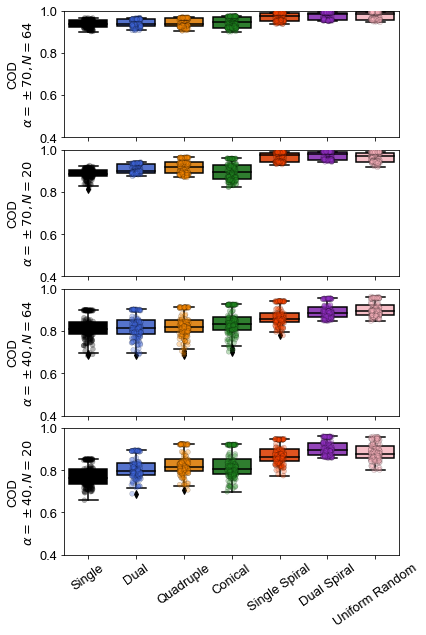

Fractional change in COD compared to single result
Dual :	 1.021 ± 0.002
Quadruple :	 1.034 ± 0.003
Conical :	 1.028 ± 0.003
Single Spiral :	 1.083 ± 0.005
Dual Spiral :	 1.103 ± 0.005
Uniform Random :	 1.097 ± 0.005


In [1900]:
font = {'family':'sans-serif','sans-serif':'Arial',
        'size'   : 13}
matplotlib.rc('font', **font)
bigdf=pd.DataFrame()
import seaborn as sn
f,axs = plt.subplots(nrows=4,figsize=(6,10),sharex=True)
modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','rand']
nicemodes = ['Single', 'Dual', 'Quadruple', 'Conical', 'Single Spiral', 'Dual Spiral', 'Uniform Random']

colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']
my_pal = {}
for i,c in enumerate(colors):
    my_pal[nicemodes[i]]=c

for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_main3.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
    df.columns=nicemodes
    
    sn.boxplot(data=df,orient='v',dodge=True,ax=axs[i],palette=my_pal)
    sn.stripplot(data=df,jitter=True,alpha=.3,ax=axs[i],palette=my_pal,edgecolor='k',linewidth=.4)
    #sn.stripplot(data=df,jitter=True,alpha=.1,ax=axs[i],color='gray')
    
    for m in nicemodes[1:]:
        df[m]=df[m]/df['Single']

    bigdf=bigdf.append(df)

    
plt.xticks(rotation=35)

for ax in axs:
    ax.set_ylim([.4,1])

axs[0].set_ylabel('COD\n'+r'$\alpha=\pm70, N=64$')
axs[1].set_ylabel('COD\n'+r'$\alpha=\pm70, N=20$')
axs[2].set_ylabel('COD\n'+r'$\alpha=\pm40, N=64$')
axs[3].set_ylabel('COD\n'+r'$\alpha=\pm40, N=20$')

f.subplots_adjust(hspace=.1)
plt.show()

for m in nicemodes[1:]:
    df[m]=df[m]/df['Single']
    

print('Fractional change in COD compared to single result')
for i in range(1,7):
    print(nicemodes[i],':\t %.3f'%np.mean(bigdf,axis=0)[i],'±','%.3f'%(np.std(bigdf,axis=0)[i]/(5*30)**0.5))

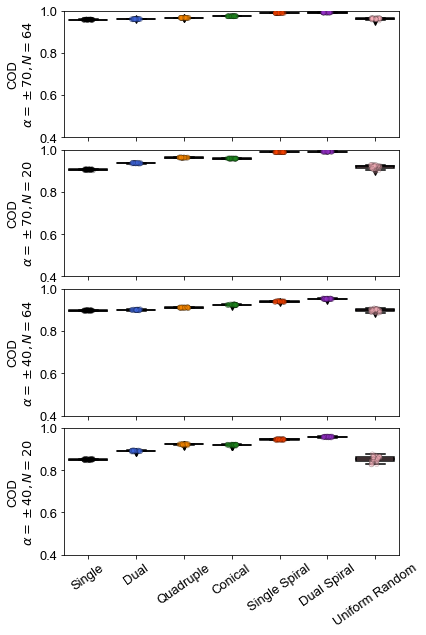

Fractional change in COD compared to single result
Dual :	 1.048 ± 0.002
Quadruple :	 1.084 ± 0.002
Conical :	 1.081 ± 0.002
Single Spiral :	 1.112 ± 0.002
Dual Spiral :	 1.126 ± 0.002
Uniform Random :	 1.003 ± 0.015


In [1713]:
font = {'family':'sans-serif','sans-serif':'Arial',
        'size'   : 13}
matplotlib.rc('font', **font)
import seaborn as sn
f,axs = plt.subplots(nrows=4,figsize=(6,10),sharex=True)
modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','rand']
nicemodes = ['Single', 'Dual', 'Quadruple', 'Conical', 'Single Spiral', 'Dual Spiral', 'Uniform Random']

colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']
my_pal = {}
for i,c in enumerate(colors):
    my_pal[nicemodes[i]]=c

for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in ['sph']:
        r = np.load('Data/c%s-%s_main2.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
    df.columns=nicemodes
    
    sn.boxplot(data=df,orient='v',dodge=True,ax=axs[i],palette=my_pal)
    sn.stripplot(data=df,jitter=True,alpha=.3,ax=axs[i],palette=my_pal,edgecolor='k',linewidth=.4)
    #sn.stripplot(data=df,jitter=True,alpha=.1,ax=axs[i],color='gray')
    
plt.xticks(rotation=35)

for ax in axs:
    ax.set_ylim([.4,1])

axs[0].set_ylabel('COD\n'+r'$\alpha=\pm70, N=64$')
axs[1].set_ylabel('COD\n'+r'$\alpha=\pm70, N=20$')
axs[2].set_ylabel('COD\n'+r'$\alpha=\pm40, N=64$')
axs[3].set_ylabel('COD\n'+r'$\alpha=\pm40, N=20$')

f.subplots_adjust(hspace=.1)
plt.show()

for m in nicemodes[1:]:
    df[m]=df[m]/df['Single']
    

print('Fractional change in COD compared to single result')
for i in range(1,7):
    print(nicemodes[i],':\t %.3f'%np.mean(df,axis=0)[i],'±','%.3f'%np.std(df,axis=0)[i])

### Visualisation

[]

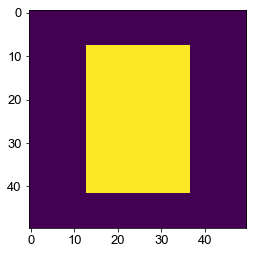

In [8]:

angles

In [74]:
alpha=40#70 
n_tilt=20#64
beta=90
dist_n2=5#7
gamma=180
modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','uniform-rand']
nicemodes = ['Single', 'Dual', 'Quadruple', 'Conical', 'Single Spiral', 'Dual Spiral', 'Uniform Random']
colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']

all_res = []
recons=[]
#ax,ay,az=np.random.rand(3)*5
for i in range(1):

    #Pr = ma.rotate_bulk(P,ax,ay,az)
    Pr=Ps[1]
    res = []
    for val in modes:
        angles = generate_angles(mode=val,alpha=alpha,n_tilt=n_tilt,beta=beta,dist_n2=dist_n2,gamma=gamma)

        if val in ['sx-g2','sx2-dual','uniform-rand'] :
            vectors = generate_vectors_2(angles)
            raw_data = generate_proj_data_2(Pr,angles,normalise=False)
        else:
            vectors = ma.generate_vectors(angles)
            raw_data = ma.generate_proj_data(Pr,angles)

        raw_data = ma.noisy(raw_data,noise_typ='poisson',val_pois=100)
        r = ma.generate_reconstruction(raw_data,vectors,algorithm='TV1',niter=20,weight=.1)
        r = ma.reorient_reconstruction(r)
        recons.append(r)
        cod = ma.COD(Pr,r)
        res.append(cod)
    print(res)
    all_res.append(res)

[0.7708307187598633, 0.7981794333605045, 0.7980317635684581, 0.7721424719608708, 0.8658893405850043, 0.9024499136534229, 0.8881325734563993]


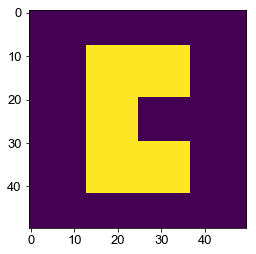

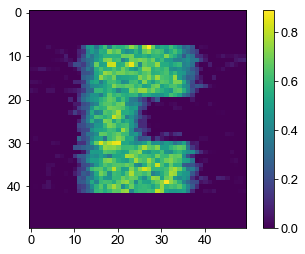

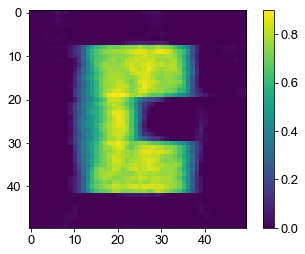

In [39]:
i=30
plt.imshow(Ps[0][:,i])
plt.show()
plt.imshow(recons[0][:,i])
plt.colorbar()

plt.show()
plt.imshow(recons[1][:,i])
plt.colorbar()

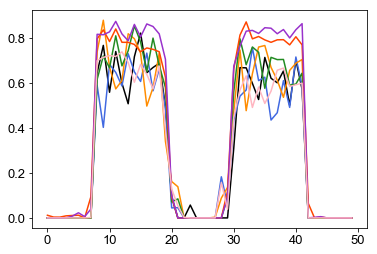

In [44]:
for i,c in enumerate(colors):
    plt.plot(recons[i][:,30,30],c=c)

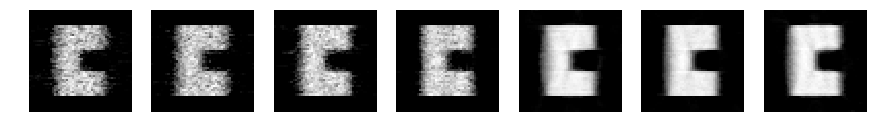

In [69]:
f,axs = plt.subplots(ncols=7,figsize=(15,3))

for i,c in enumerate(colors):
    axs[i].imshow(recons[i][:,30,:],cmap='Greys_r')
    axs[i].axis('off')

In [76]:
from vtk.util import numpy_support
import vtk
import numpy as np

data = recons[4]

# vtkImageData is the vtk image volume type
imdata = vtk.vtkImageData()
# this is where the conversion happens
depthArray = numpy_support.numpy_to_vtk(data.ravel(), deep=True, array_type=vtk.VTK_DOUBLE)

# fill the vtk image data object
imdata.SetDimensions(data.shape)
imdata.SetSpacing([1,1,1])
imdata.SetOrigin([0,0,0])
imdata.GetPointData().SetScalars(depthArray)

# f.ex. save it as mhd file
writer = vtk.vtkMetaImageWriter()
writer.SetFileName("tet_sx.mhd")
writer.SetInputData(imdata)
writer.Write()

In [1727]:
np.shape(Pr)

(50, 50, 50)

In [1885]:
f=.5
_,_,_,Pr =ma.generate_sphere(n=100*f,r=30*f)

In [1744]:
X,Y,Z,Pr = ma.generate_pillar_cavities(n=100*f,x_len=70*f,y_len=50*f,z_len=50*f,r_cyl=15*f,depth=25*f)

In [1752]:
f=.5
P = binary_blobs(length=int(100*f), n_dim=3, volume_fraction=0.13, seed=20,blob_size_fraction=.32)
P = P[:,:,int(10*2*f):int(40*2*f)]
Pr = np.pad(P,((0,0),(0,0),(10,10)))

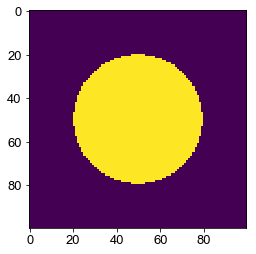

In [1737]:
plt.imshow(Pr[:,:,50])

In [1742]:
angles

[[-4.309412087010129, 0, -107.07559177678912],
 [-56.8105331731919, 0, -86.89172659257568],
 [-39.35067114413754, 0, 147.46950020293076],
 [-46.32529674531783, 0, 24.597498819362045],
 [-57.68393461434832, 0, -49.47700804300936],
 [48.749261933804746, 0, -149.37686356025205],
 [42.06467020829701, 0, -109.93533926704669],
 [68.55642153781777, 0, 120.43714087634805],
 [-39.16241064143297, 0, 171.7672004216792],
 [37.936591393381846, 0, 5.102102743695468],
 [-26.322233732915198, 0, 17.315075961831354],
 [-50.018837297306526, 0, 10.8952789354027],
 [-45.355286125245655, 0, -53.18618927377828],
 [-40.71526689937419, 0, -110.53488120800068],
 [59.89799428629529, 0, 35.57010037187837],
 [-69.56144556857924, 0, -131.22498862867815],
 [-48.12474026165858, 0, 110.26480598511262],
 [-41.08934196597992, 0, 18.927969189127936],
 [-59.62302811487745, 0, -36.80262065307525],
 [-23.998884463650725, 0, -82.9403350172662],
 [-53.221216085060284, 0, -93.18473862535092],
 [55.39061140117428, 0, 125.682912

In [1892]:
# showing randoms power

#Pr = Ps[2]
res = []
alpha=50
beta=70
gamma=180
vals=['x','uniform-rand','uniform-rand','uniform-rand']
alg='TV1'
niter=20
weight=0.1

n_tilt=60

cods = []

n_tilts = [20,64]
for n_tilt in n_tilts:
    for val in vals:
        angles = generate_angles(mode=val,alpha=alpha,n_tilt=n_tilt,beta=beta,dist_n2=dist_n2,gamma=gamma)

        if val in ['sx-g2','sx2-dual'] :
            vectors = generate_vectors_2(angles)
            raw_data = generate_proj_data_2(Pr,angles,normalise=False)
        else:
            vectors = ma.generate_vectors(angles)
            raw_data = ma.generate_proj_data(Pr,angles)

        #raw_data = ma.noisy(raw_data,noise_typ='poisson',val_pois=150)
        r = ma.generate_reconstruction(raw_data,vectors,algorithm=alg,niter=niter,weight=weight)
        r = ma.reorient_reconstruction(r)
        cod = ma.COD(Pr,r)
        res.append(cod)
        print(val,cod)
        cods.append(cod)


x 0.9458600552913474
uniform-rand 0.9237616400908331
uniform-rand 0.9285598890884496
uniform-rand 0.9339491628883699
x 0.9431278074924816
uniform-rand 0.9239091868088071
uniform-rand 0.9278847404989191
uniform-rand 0.9306112171782134


Text(0.5, 0, 'Number of projections')

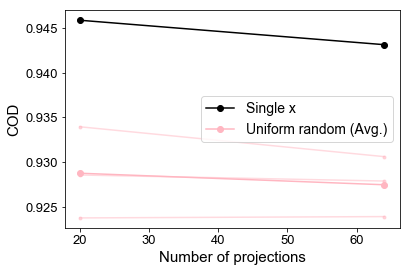

In [1893]:
plt.plot(n_tilts,cods[::4],'o-',label='Single x',color='k')
plt.plot(n_tilts,cods[1::4],'.-',color='lightpink',alpha=.5)
plt.plot(n_tilts,cods[2::4],'.-',color='lightpink',alpha=.5)
plt.plot(n_tilts,cods[3::4],'.-',color='lightpink',alpha=.5)
plt.plot(n_tilts,np.mean([cods[2::4],cods[3::4],cods[1::4]],axis=0),'o-',label='Uniform random (Avg.)',color='lightpink')
plt.legend(fontsize=14)

plt.ylabel('COD',fontsize=15)
plt.xlabel('Number of projections',fontsize=15)

In [323]:
for c in range(1,5):
    
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_main1.npy'%(c,nam))
        all_rs.append(r)

    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)

    df = pd.DataFrame(data)
    df = df.T
    df.columns=nicemodes
    print(np.mean(df.iloc[:,0]))

0.9415429447281053
0.8874484389349474
0.818697809899629
0.770235599261817


In [259]:
for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_main1.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
df.columns=nicemodes
    
#df=df.sub(df.iloc[:,0], axis=0)
#df = df/df['Single']
for m in nicemodes[1:]:
    df[m]=df[m]/df['Single']
    

for i in range(1,7):
    print(nicemodes[i],':\t %.3f'%np.mean(df,axis=0)[i],'±','%.3f'%np.std(df,axis=0)[i])

Dual :	 1.049 ± 0.017
Quadruple :	 1.076 ± 0.031
Conical :	 1.061 ± 0.033
Single Spiral :	 1.138 ± 0.071
Dual Spiral :	 1.177 ± 0.062
Random :	 0.970 ± 0.040


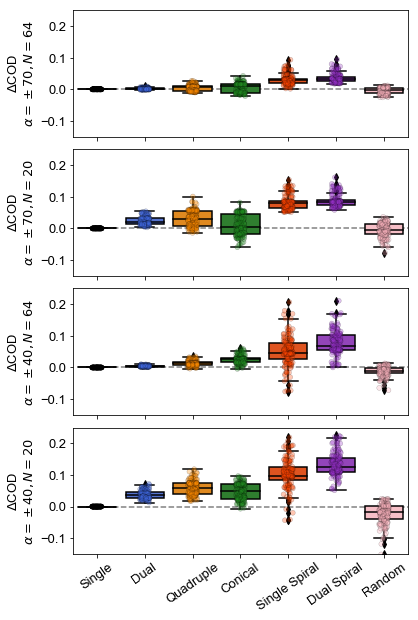

In [206]:
font = {'family':'sans-serif','sans-serif':'Arial',
        'size'   : 13}
matplotlib.rc('font', **font)

f,axs = plt.subplots(nrows=4,figsize=(6,10),sharex=True)


for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_main1.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
    df.columns=nicemodes
    
    df=df.sub(df.iloc[:,0], axis=0)
    sn.boxplot(data=df,orient='v',dodge=True,ax=axs[i],palette=my_pal)
    sn.stripplot(data=df,jitter=True,alpha=.3,ax=axs[i],palette=my_pal,edgecolor='k',linewidth=.4)
    
plt.xticks(rotation=35)

for ax in axs:
    ax.set_ylim([-.15,.25])
    ax.plot([0,9],[0,0],'k--',alpha=.5,zorder=0)

axs[0].set_ylabel('$\Delta$COD\n'+r'$\alpha=\pm70, N=64$')
axs[1].set_ylabel('$\Delta$COD\n'+r'$\alpha=\pm70, N=20$')
axs[2].set_ylabel('$\Delta$COD\n'+r'$\alpha=\pm40, N=64$')
axs[3].set_ylabel('$\Delta$COD\n'+r'$\alpha=\pm40, N=20$')

f.subplots_adjust(hspace=.1)
plt.show()

Text(0, 0.5, '$\\Delta$ Standard deviation')

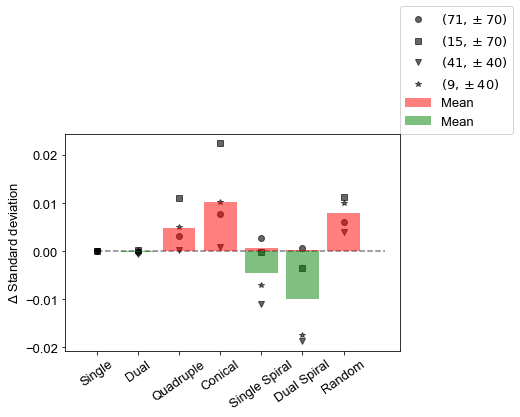

In [214]:
ls=[r'$(71, \pm70)$',r'$(15, \pm70)$',r'$(41, \pm40)$',r'$(9, \pm40)$']
ms=['o','s','v','*']
all_sig=[]
for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_main1.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(7):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
    df.columns=modes

    sigmas = np.std(df,axis=0)
    sigmas=sigmas-sigmas[0]
    all_sig.append(sigmas)
    plt.plot(nicemodes,sigmas,'.',label=ls[i],marker=ms[i],alpha=.6,color='k')
    

plt.plot([0,7],[0,0],'k--',alpha=.5,zorder=0)

pos = np.array(all_sig)
pos[pos<0]=0
plt.bar(nicemodes,np.mean(pos,axis=0),label='Mean',alpha=.5,color='r',zorder=100)

neg = np.array(all_sig)
neg[neg>0]=0
plt.bar(nicemodes,np.mean(neg,axis=0),label='Mean',alpha=.5,color='g',zorder=100)

plt.legend(loc=(1,1))
plt.xticks(rotation=35)
plt.ylabel('$\Delta$ Standard deviation')

## SI results for beta tilt options

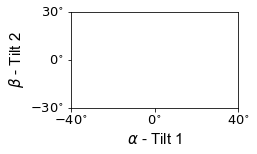

x 64


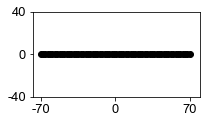

conical-b 63


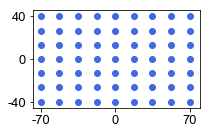

sx-b 64


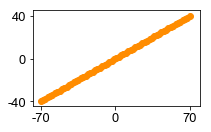

sxb-dual 64


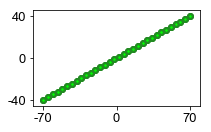

In [1907]:
font = {'family':'sans-serif','sans-serif':'Arial',
            'size'   : 13}
matplotlib.rc('font', **font)

modes = ['x','conical-b','sx-b','sxb-dual']
colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']

n_tilt,dist = 64,7

plt.figure(figsize=(3,3))
# plt.xlim([-70,70])
# plt.ylim([-40,40])

plt.xticks([-70,0,70],['$-40^{\circ}$','$0^{\circ}$','$40^{\circ}$'])
plt.yticks([-40,0,40],['$-30^{\circ}$','$0^{\circ}$','$30^{\circ}$'])
ax=plt.gca()
ax.set_aspect('equal')


plt.xlabel(r'$\alpha$ - Tilt 1',fontsize=15)
plt.ylabel(r'$\beta$ - Tilt 2',fontsize=15)
plt.show()

for i,m in enumerate(modes):
    
    c=colors[i]
    ang = np.array(generate_angles(m,n_tilt=n_tilt,dist_n2=dist,alpha=70,beta=40))
    print(m,len(ang))
    axs = ang[:,0]
    azs = ang[:,2]
    
    plt.figure(figsize=(3,3))
    
    for a in ang:
        mrot = ma.rotation_matrix(a[0],a[1],a[2],intrinsic=True)
        b = np.dot(mrot,[0,0,1])
        plt.scatter(a[0],a[1],color=c)
        if m == 'sxb-dual':
            plt.scatter(a[0],a[1],color='lime',marker='.',s=9)
    
    # plt.xlim([-70,70])
    # plt.ylim([-37,37])
    
    plt.xticks([-70,0,70],[-70,0,70])
    plt.yticks([-40,0,40],[-40,0,40])
    
    ax=plt.gca()
    ax.set_aspect('equal')
    plt.show()
    

In [1706]:
modes = ['x','conical-b','sx-b','sxb-dual']
#n_tilt, dist_n2 = 20, 5
n_tilt, dist_n2 = 64, 7

angles = generate_angles(mode='sx-b',n_tilt=n_tilt,alpha=40,beta=30,gamma=180,dist_n2=dist_n2)
angles

[[-40.0, -30.0, 0],
 [-38.73015873015873, -29.047619047619047, 0],
 [-37.46031746031746, -28.095238095238095, 0],
 [-36.19047619047619, -27.142857142857142, 0],
 [-34.920634920634924, -26.19047619047619, 0],
 [-33.65079365079365, -25.238095238095237, 0],
 [-32.38095238095238, -24.285714285714285, 0],
 [-31.11111111111111, -23.333333333333336, 0],
 [-29.841269841269842, -22.38095238095238, 0],
 [-28.571428571428573, -21.42857142857143, 0],
 [-27.301587301587304, -20.476190476190474, 0],
 [-26.03174603174603, -19.523809523809526, 0],
 [-24.761904761904763, -18.571428571428573, 0],
 [-23.492063492063494, -17.61904761904762, 0],
 [-22.22222222222222, -16.666666666666668, 0],
 [-20.952380952380953, -15.714285714285715, 0],
 [-19.682539682539684, -14.761904761904763, 0],
 [-18.412698412698415, -13.80952380952381, 0],
 [-17.142857142857146, -12.857142857142858, 0],
 [-15.873015873015873, -11.904761904761905, 0],
 [-14.603174603174605, -10.952380952380953, 0],
 [-13.333333333333336, -10.0, 0],

x 64


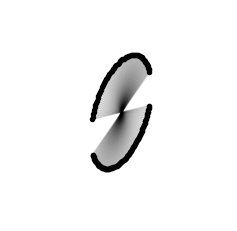

conical-b 63


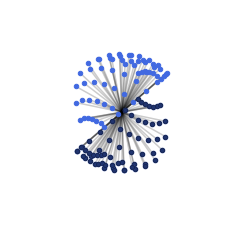

sx-b 64


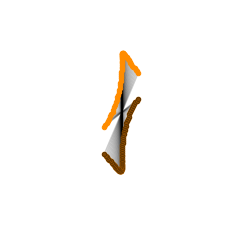

sxb-dual 64


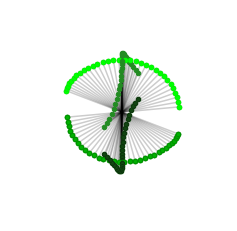

In [1903]:
modes = ['x','conical-b','sx-b','sxb-dual']
#n_tilt, dist_n2 = 20, 5
n_tilt, dist_n2 = 64, 7

#set distn2=7 for n=64, for high
# set distn2=5, n = 20 for low
colors = ['k','royalblue','darkorange','forestgreen','orangered','darkorchid','lightpink']
for j,val in enumerate(modes):
    c = colors[j]

    angles = generate_angles(mode=val,n_tilt=n_tilt,alpha=70,beta=40,gamma=180,dist_n2=dist_n2)

    # plot a collection scheme
    %matplotlib inline
    fig = plt.figure(figsize=(4,4))
    ax1 = fig.gca(projection='3d')

    bs = []
    for i,a in enumerate(angles):
        mrot = ma.rotation_matrix(a[0],a[1],a[2],intrinsic=True)
        b = np.dot(mrot,[0,0,1])
        bs.append(b)
        plt.plot([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],'-',color='k',alpha=.2)
        #ax1.scatter([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],c=[-b[2],b[2]],s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([b[0]],[b[1]],[b[2]],c=c,s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([-b[0]],[-b[1]],[-b[2]],c=c,s=20,cmap='coolwarm',alpha=1)
        ax1.scatter([-b[0]],[-b[1]],[-b[2]],c='k',s=20,cmap='coolwarm',alpha=.5)
        if val == 'sxb-dual' and a[2]==90:
            ax1.scatter([b[0]],[b[1]],[b[2]],c='lime',s=20,cmap='coolwarm',alpha=1)
            ax1.scatter([-b[0]],[-b[1]],[-b[2]],c='lime',s=20,cmap='coolwarm',alpha=1)
            ax1.scatter([-b[0]],[-b[1]],[-b[2]],c='k',s=20,cmap='coolwarm',alpha=.3)

    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.set_zticklabels([])
    plt.xlabel('x',fontsize='20')
    plt.ylabel('y',fontsize='20')
    ax1.set_zlabel('z',fontsize='20')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    ax1.set_zlim([-1,1])
    plt.axis('off')

    f = plt.gcf()
    f.patch.set_facecolor('white')
    print(val, len(angles))
    plt.show()

In [1904]:
def test_series_beta(P,fname='test',ntest=30,alg='TV1',niter=20,weight=0.1,alpha = 45,n_tilt=30,beta=30,gamma=180,dist_n2=7):
    modes=['x','conical-b','sx-b','sxb-dual']

    all_res = []
    for i in range(ntest):
        ax,ay,az=np.random.rand(3)*360
        Pr = ma.rotate_bulk(P,ax,ay,az)
        res = []
        for val in modes:
            angles = generate_angles(mode=val,alpha=alpha,n_tilt=n_tilt,beta=beta,dist_n2=dist_n2,gamma=gamma)
            
            if val in ['sx-g2','sx2-dual'] :
                vectors = generate_vectors_2(angles)
                raw_data = generate_proj_data_2(Pr,angles,normalise=False)
            else:
                vectors = ma.generate_vectors(angles)
                raw_data = ma.generate_proj_data(Pr,angles)
                
            raw_data = ma.noisy(raw_data,noise_typ='poisson',val_pois=100)
            r = ma.generate_reconstruction(raw_data,vectors,algorithm=alg,niter=niter,weight=weight)
            r = ma.reorient_reconstruction(r)
            cod = ma.COD(Pr,r)
            res.append(cod)
        print(res)
        all_res.append(res)
    np.save('Data/%s.npy'%fname,all_res)
    return all_res

# case 1 hight tilt, high N
alpha = 70
beta = 90
n_tilt,dist_n2 = 64,7
for i,P in enumerate(Ps):
    _=test_series_beta(P,fname=r'c1-%s_si2'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=40,dist_n2=dist_n2)

# # case 2 - high tilt low N)
alpha = 70
beta = 90
n_tilt,dist_n2 = 20,5
for i,P in enumerate(Ps):
    _=test_series_beta(P,fname=r'c2-%s_si2'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=40,dist_n2=dist_n2)

# # case 3 - low tilt high N
alpha = 40
n_tilt,dist_n2 = 64,7
for i,P in enumerate(Ps):
    _=test_series_beta(P,fname=r'c3-%s_si2'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=20,dist_n2=dist_n2)
    
# # case 4 - low tilt low N
alpha = 40
beta = 30
n_tilt,dist_n2 = 20,5
for i,P in enumerate(Ps):
    _=test_series_beta(P,fname=r'c4-%s_si2'%pnames[i],alpha=alpha,n_tilt=n_tilt,gamma=180,beta=20,dist_n2=dist_n2)

[0.9248576352933746, 0.9464188196492352, 0.9528270734337497, 0.9562966032692602]
[0.9329381855193037, 0.9493208456570806, 0.948549860404662, 0.9510374149330164]
[0.9155134622079198, 0.9359066818397155, 0.9368506519958844, 0.9407751504441632]
[0.9414854726138351, 0.9493021810495382, 0.9554344398993638, 0.9587541702713619]
[0.9566302724190198, 0.9521574002567633, 0.9430988605098749, 0.9463484753143285]
[0.9424441900191705, 0.9468535217946734, 0.9471857943191819, 0.950323250899775]
[0.944295356738033, 0.9512396184326938, 0.9498347397311467, 0.9521012551128645]
[0.9262376392016322, 0.9484158195978956, 0.9585305400909876, 0.9596856691960896]
[0.934490928980401, 0.9487885477240557, 0.9588590310454467, 0.9610889907828984]
[0.8763922159562382, 0.9491816258758133, 0.9624516576152129, 0.9646249292875897]
[0.9344709372143317, 0.9482632994560937, 0.9507651811159423, 0.9553560698433883]
[0.9236867680030209, 0.9472384974321465, 0.9468031114110542, 0.9509665229758719]
[0.9302187706686142, 0.948700689

Fractional change in COD compared to single result
Conical β :	 1.106 ± 0.048
Single Spiral β :	 1.043 ± 0.050
Dual Spiral β :	 1.077 ± 0.052


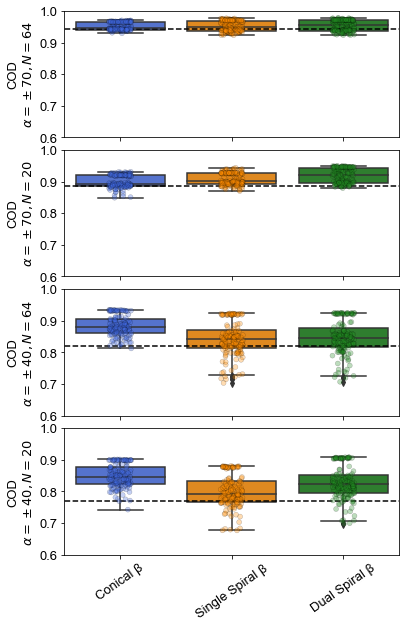

In [1906]:
font = {'family':'sans-serif','sans-serif':'Arial',
        'size'   : 13}
matplotlib.rc('font', **font)
import seaborn as sn
f,axs = plt.subplots(nrows=4,figsize=(6,10),sharex=True)
#modes = ['x','dual','quad','conical-g','sx-g2','sx2-dual','rand']
modes=['x','conical-b','sx-b','sxb-dual']
nicemodes = ['Single', 'Conical β', 'Single Spiral β', 'Dual Spiral β']

colors = ['k','royalblue','darkorange','forestgreen']#,'orangered','darkorchid','lightpink']
my_pal = {}
for i,c in enumerate(colors):
    my_pal[nicemodes[i]]=c

for i,c in enumerate(range(1,4+1)):
    all_rs = []
    for nam in pnames:
        r = np.load('Data/c%s-%s_si2.npy'%(c,nam))
        all_rs.append(r)
    
    data = []
    for j in range(4):
        d=np.take(all_rs,j,-1).flatten()
        data.append(d)
        
    df = pd.DataFrame(data)
    df = df.T
    df.columns=nicemodes
    
    df2 = df.drop(columns='Single')
    
    sn.boxplot(data=df2,orient='v',dodge=True,ax=axs[i],palette=my_pal)
    sn.stripplot(data=df2,jitter=True,alpha=.3,ax=axs[i],palette=my_pal,edgecolor='k',linewidth=.4)
    #sn.stripplot(data=df,jitter=True,alpha=.1,ax=axs[i],color='gray')
    
plt.xticks(rotation=35)

for ax in axs:
    ax.set_ylim([.6,1])

axs[0].set_ylabel('COD\n'+r'$\alpha=\pm70, N=64$')
axs[1].set_ylabel('COD\n'+r'$\alpha=\pm70, N=20$')
axs[2].set_ylabel('COD\n'+r'$\alpha=\pm40, N=64$')
axs[3].set_ylabel('COD\n'+r'$\alpha=\pm40, N=20$')

f.subplots_adjust(hspace=.1)


for m in nicemodes[1:]:
    df[m]=df[m]/df['Single']
    

print('Fractional change in COD compared to single result')
for i in range(1,4):
    print(nicemodes[i],':\t %.3f'%np.mean(df,axis=0)[i],'±','%.3f'%np.std(df,axis=0)[i])
    
singles = [0.9415429447281053,
0.8874484389349474,
0.818697809899629,
0.770235599261817]

for i in range(4):
    axs[i].plot((-1,4),(singles[i],singles[i]),'k--')
plt.show()